# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [47]:
import pandas as pd
import numpy as np

In [48]:
transactions = pd.read_csv("project_transactions.csv")

In [49]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [50]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [51]:
unique = transactions.nunique()
print(unique)


household_key          2099
BASKET_ID            232939
DAY                     711
PRODUCT_ID            84138
QUANTITY              10593
SALES_VALUE            5327
STORE_ID                526
RETAIL_DISC            2279
WEEK_NO                 102
COUPON_DISC             370
COUPON_MATCH_DISC        79
dtype: int64


In [52]:
null = transactions[['household_key','PRODUCT_ID']].isnull().sum()
print(null)


household_key    0
PRODUCT_ID       0
dtype: int64


## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [53]:
transactions['total_discount'] = transactions['RETAIL_DISC'] + transactions['COUPON_DISC']
transactions['percentage_discount'] = (transactions['total_discount'] / transactions['SALES_VALUE']).abs()
transactions['percentage_discount'] = transactions['percentage_discount'].clip(0, 1)
transactions.drop(columns=['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'])

print(transactions.head())

   household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           1364  26984896261    1      842930         1         2.19   
1           1364  26984896261    1      897044         1         2.99   
2           1364  26984896261    1      920955         1         3.09   
3           1364  26984896261    1      937406         1         2.50   
4           1364  26984896261    1      981760         1         0.60   

   STORE_ID  RETAIL_DISC  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  \
0     31742         0.00        1          0.0                0.0   
1     31742        -0.40        1          0.0                0.0   
2     31742         0.00        1          0.0                0.0   
3     31742        -0.99        1          0.0                0.0   
4     31742        -0.79        1          0.0                0.0   

   total_discount  percentage_discount  
0            0.00             0.000000  
1           -0.40             0.133779  
2            0.00      

## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [66]:

transactions['total_discount'] = transactions['RETAIL_DISC'] + transactions['COUPON_DISC']
transactions['percentage_discount'] = (transactions['total_discount'] / transactions['SALES_VALUE']).abs()
transactions['percentage_discount'] = transactions['percentage_discount'].clip(0, 1)
transactions.drop(columns=['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], inplace=True)

total_sales = transactions['SALES_VALUE'].sum()
total_discount = transactions['total_discount'].sum()
overall_percentage_discount = np.abs(total_discount / total_sales)
total_quantity_sold = transactions['QUANTITY'].sum()
max_quantity_sold = transactions['QUANTITY'].max()
max_quantity_row = transactions[transactions['QUANTITY'] == max_quantity_sold]
total_sales_per_basket = total_sales / transactions['BASKET_ID'].nunique()

print(f"Total Sales: {total_sales}")
print(f"Total Discount: {total_discount}")
print(f"Overall Percentage Discount: {overall_percentage_discount}")
print(f"Total Quantity Sold: {total_quantity_sold}")
print(f"Max Quantity Sold in a Single Row: {max_quantity_sold}")
print("Row with Max Quantity Sold:")
print(max_quantity_row)



Total Sales: 6666243.499999999
Total Discount: -1178658.0799999998
Overall Percentage Discount: 0.1768099350106248
Total Quantity Sold: 216713611
Max Quantity Sold in a Single Row: 89638
Row with Max Quantity Sold:
         household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
1442095            630  34749153595  503     6534178     89638        250.0   

         STORE_ID  WEEK_NO  total_discount  percentage_discount  
1442095       384       73          -13.45               0.0538  


## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


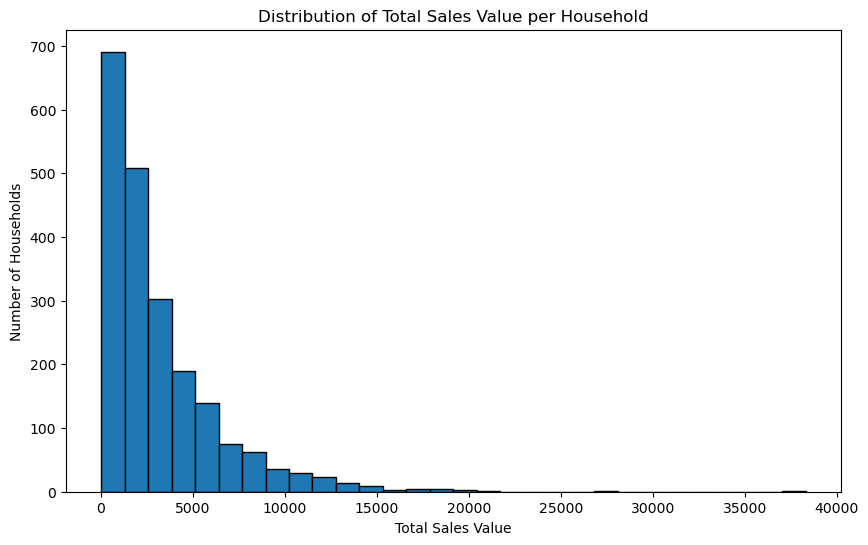

Top 10 Households by Quantity Purchased:
household_key
1023    4479917
755     3141769
1609    2146715
13      1863829
1430    1741892
1527    1734632
1762    1669880
707     1640193
1029    1496204
1314    1492863
Name: QUANTITY, dtype: int64
Top 10 Households by Sales Value:
household_key
1023    38319.79
1609    27859.68
1453    21661.29
1430    20352.99
718     19299.86
707     19194.42
1653    19153.75
1111    18894.72
982     18790.34
400     18494.14
Name: SALES_VALUE, dtype: float64


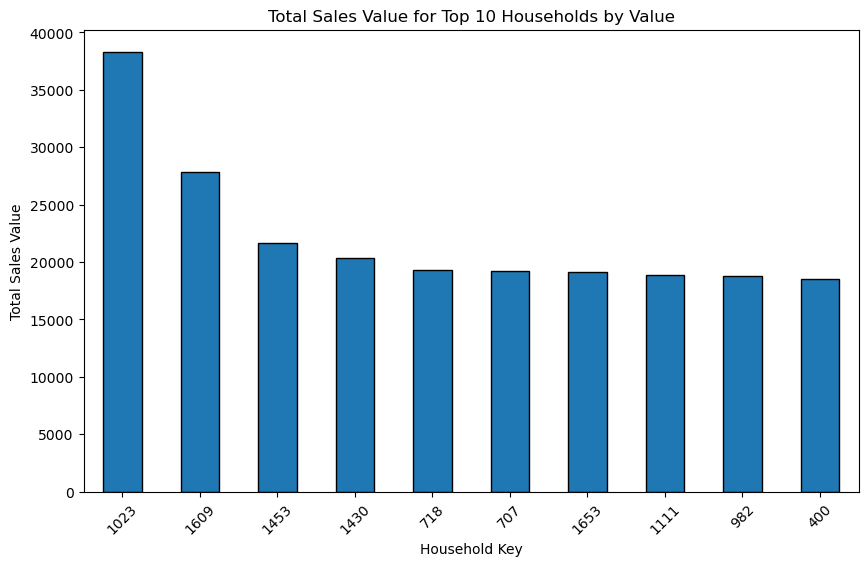

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

household_sales = transactions.groupby('household_key')['SALES_VALUE'].sum()

plt.figure(figsize=(10, 6))
household_sales.plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Total Sales Value per Household')
plt.xlabel('Total Sales Value')
plt.ylabel('Number of Households')
plt.show()

household_quantity = transactions.groupby('household_key')['QUANTITY'].sum()

top_10_households_quantity = household_quantity.nlargest(10)
print("Top 10 Households by Quantity Purchased:")
print(top_10_households_quantity)

top_10_households_sales = household_sales.nlargest(10)
print("Top 10 Households by Sales Value:")
print(top_10_households_sales)

plt.figure(figsize=(10, 6))
top_10_households_sales.sort_values(ascending=False).plot(kind='bar', edgecolor='black')
plt.title('Total Sales Value for Top 10 Households by Value')
plt.xlabel('Household Key')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

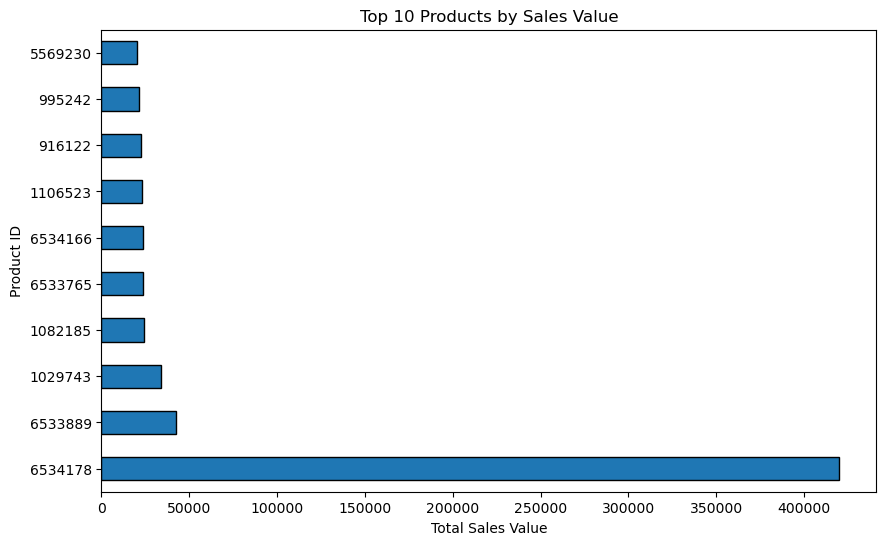

Average Discount Rate for All Products: 1.1815323986822784e-05
Average Discount Rate for Top 10 Selling Products: 0.0
Most Common PRODUCT_ID among Top 10 Households by Sales Value: 1082185


KeyError: "['PRODUCT_NAME'] not in index"

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

transactions = pd.read_csv("project_transactions.csv")
products = pd.read_csv("product.csv")

product_sales = transactions.groupby('PRODUCT_ID')['SALES_VALUE'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
product_sales.plot(kind='barh', edgecolor='black')
plt.title('Top 10 Products by Sales Value')
plt.xlabel('Total Sales Value')
plt.ylabel('Product ID')
plt.show()

transactions['total_discount'] = transactions['RETAIL_DISC'] + transactions['COUPON_DISC']
transactions['percentage_discount'] = (transactions['total_discount'] / transactions['SALES_VALUE']).clip(0, 1)
average_discount_rate = transactions['percentage_discount'].mean()

top_10_products = product_sales.index
top_10_transactions = transactions[transactions['PRODUCT_ID'].isin(top_10_products)]
top_10_discount_rate = top_10_transactions['percentage_discount'].mean()

print("Average Discount Rate for All Products:", average_discount_rate)
print("Average Discount Rate for Top 10 Selling Products:", top_10_discount_rate)

household_sales = transactions.groupby('household_key')['SALES_VALUE'].sum()
top_10_households = household_sales.nlargest(10).index
top_10_household_transactions = transactions[transactions['household_key'].isin(top_10_households)]
most_common_product_id = top_10_household_transactions['PRODUCT_ID'].mode()[0]

print("Most Common PRODUCT_ID among Top 10 Households by Sales Value:", most_common_product_id)

top_10_product_names = products[products['PRODUCT_ID'].isin(top_10_products)][['PRODUCT_ID', 'PRODUCT_NAME']]
print("Top 10 Products by Sales:")
print(top_10_product_names)

max_quantity_row = transactions.loc[transactions['QUANTITY'].idxmax()]
max_quantity_product_id = max_quantity_row['PRODUCT_ID']
max_quantity_product_name = products[products['PRODUCT_ID'] == max_quantity_product_id]['PRODUCT_NAME'].values[0]

print("Product Name of the Item with the Highest Quantity Sold in a Single Row:", max_quantity_product_name)
